<h1><center>NLP Project</center></h1>
<h3><center>Spring 2022</center></h3>
<hr style="border:2px solid black"> </hr>

## <u> Please don't forget to fill in this data </u>
**Member 1**

Name:Sherif Wael

GUC-ID: 43-2241

**Member 2**

Name: Ahmed Salah

GUC-ID: 43-18637

**Member 3**

Name:Abdelrahman Khattab

GUC-ID: 43-15526

**Member 4 (Optional)**

Name: Mohamed Ahmed Abdelfattah

GUC-ID:43-3148

<hr style="border:2px solid black"> </hr>

## Imports

In [ ]:
import requests, zipfile, io
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

import nltk
import re
import string
from nltk.tokenize import word_tokenize
nltk.download("stopwords")

import nltk
nltk.download('wordnet')
from nltk.stem import 	WordNetLemmatizer
import re
import numpy as np



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
url = 'https://github.com/abzokhattab/NLP/blob/main/scripts.zip?raw=true'
filename = 'scripts/9.txt'

r = requests.get(url)
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()


## Read Data

In [ ]:
# Data

In [ ]:
import glob
txt_files = glob.glob("scripts/*.txt")
txt_files

['scripts/Heavenly-Creatures.txt',
 'scripts/Bridesmaids.txt',
 'scripts/Gladiator.txt',
 'scripts/Hurt-Locker,-The.txt',
 'scripts/Frances.txt',
 'scripts/Tinker-Tailor-Soldier-Spy.txt',
 'scripts/Bad-Country.txt',
 'scripts/Graduate,-The.txt',
 'scripts/Reservoir-Dogs.txt',
 'scripts/Enoug.txt',
 'scripts/Life-As-A-House.txt',
 'scripts/Neverending-Story,-The.txt',
 'scripts/17-Again.txt',
 'scripts/Bad-Teacher.txt',
 'scripts/Fargo.txt',
 'scripts/Pet-Sematary.txt',
 'scripts/State-and-Main.txt',
 'scripts/Twins.txt',
 'scripts/Stuntman,-The.txt',
 'scripts/Wall-Stree.txt',
 'scripts/Silver-Bulle.txt',
 'scripts/Megamind.txt',
 'scripts/Minority-Repor.txt',
 'scripts/Les-Tontons-Flingueurs.txt',
 'scripts/Talented-Mr.-Ripley,-The.txt',
 'scripts/G.I.-Joe-The-Rise-of-Cobra.txt',
 'scripts/Year-One.txt',
 'scripts/Halloween.txt',
 'scripts/Thunderbirds.txt',
 'scripts/G.I.-Jane.txt',
 'scripts/La-La-Land.txt',
 'scripts/Broken-Arrow.txt',
 'scripts/Best-Exotic-Marigold-Hotel,-The.txt'

In [ ]:
def read_first_line(file):
     with open(file) as fd:
         lines = fd.readlines()
         print(lines)
     return lines

#output_strings = map(read_first_line, txt_files)  # apply read first line function all text files
read_first_line(txt_files[0])
#print(output_strings)

['\n', 'HEAVENLY CREATURES\n', '\n', 'Screenplay by\n', '\n', 'FRANCES WALSH AND PETER JACKSON\n', '\n', 'Illustrated by\n', '\n', 'PAUL HAMLYN\n', '\n', 'PROLOGUE:\n', '\n', 'Newsreel footage of Christchurch circa 1954.\n', '\n', 'EXT. VICTORIA PARK/BUSHY TRACK - LATE AFTERNOON CAMERA CRASHES out of bush and races up a dark bushy track.\n', '\n', 'CLOSE ON . . . two pairs of feet running up the track, slipping in the mud . . . desperate.\n', '\n', 'WIDE SHOT . . . reveals TWO GIRLS running up the track, distraught.\n', '\n', 'JULIET HULME: nearly 16 - tall, blond and willowy,\n', '\n', 'and\n', '\n', 'PAULINE RIEPER: 16 - dark-haired, shorter and stockier than Juliet.\n', '\n', 'It is 1954. Both girls are dressed in overcoats on a chilly winter day. They slip and stumble on the dirt track that winds up the steep Victoria Park hillside. Thick vegetation and overhanging trees give the path a tunnel-like feeling.\n', '\n', 'CUT TO:\n', '\n', "EXT. OCEANLINER'S DECK - DAYBLACK & WHITE . .

['\n',
 'HEAVENLY CREATURES\n',
 '\n',
 'Screenplay by\n',
 '\n',
 'FRANCES WALSH AND PETER JACKSON\n',
 '\n',
 'Illustrated by\n',
 '\n',
 'PAUL HAMLYN\n',
 '\n',
 'PROLOGUE:\n',
 '\n',
 'Newsreel footage of Christchurch circa 1954.\n',
 '\n',
 'EXT. VICTORIA PARK/BUSHY TRACK - LATE AFTERNOON CAMERA CRASHES out of bush and races up a dark bushy track.\n',
 '\n',
 'CLOSE ON . . . two pairs of feet running up the track, slipping in the mud . . . desperate.\n',
 '\n',
 'WIDE SHOT . . . reveals TWO GIRLS running up the track, distraught.\n',
 '\n',
 'JULIET HULME: nearly 16 - tall, blond and willowy,\n',
 '\n',
 'and\n',
 '\n',
 'PAULINE RIEPER: 16 - dark-haired, shorter and stockier than Juliet.\n',
 '\n',
 'It is 1954. Both girls are dressed in overcoats on a chilly winter day. They slip and stumble on the dirt track that winds up the steep Victoria Park hillside. Thick vegetation and overhanging trees give the path a tunnel-like feeling.\n',
 '\n',
 'CUT TO:\n',
 '\n',
 "EXT. OCEANLINE

<hr style="border:2px solid black"> </hr>

## Preprocessing

In [ ]:
from nltk.tokenize import RegexpTokenizer

def remove_punctuation(text):
  tokenizer = RegexpTokenizer(r'\w+')
  return tokenizer.tokenize(text)

In [ ]:
def remove_stopwords(text):
  stop_words = set(stopwords.words('english'))
  output= [w for w in text if not w.lower() in stop_words]
  return output


In [ ]:
nltk.download('punkt')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:


scripts = [ ] 
for file in txt_files:
  with open(file) as fd:
     data = fd.read()
     data_filtered=remove_punctuation(data)
     lemmatizer = WordNetLemmatizer()
     data_filtered=remove_stopwords(data_filtered)
     a = (map(lambda x: lemmatizer.lemmatize(x.lower()), data_filtered))
     b = list(a)
    # b = list(dict.fromkeys(list(a)))
     scripts.append([file.split("/")[1].split(".")[0],b])
    


In [ ]:
print(scripts)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
a_scores = {}
with open("a-scores.txt") as myfile:
    for line in myfile:
        line_array = " ".join(line.split()).split(" ")
        
        if len(line_array) == 3:
          value =   line_array[2]        
          name = line_array[0]+" "+line_array[1]
        elif len(line_array) == 2:
          value =   line_array[1]        
          name = line_array[0]  
        elif len(line_array) == 4:
          value =   line_array[3]        
          name = line_array[0]+" "+line_array[1]+" "+line_array[2]
        else: 
          print(line)   
        a_scores[name.strip()] = float(value.strip())

In [ ]:
d_scores = {}
with open("d-scores.txt") as myfile:
    for line in myfile:
        line_array = " ".join(line.split()).split(" ")
        
        if len(line_array) == 3:
          value =   line_array[2]        
          name = line_array[0]+" "+line_array[1]
        elif len(line_array) == 2:
          value =   line_array[1]        
          name = line_array[0]  
        elif len(line_array) == 4:
          value =   line_array[3]        
          name = line_array[0]+" "+line_array[1]+" "+line_array[2]
        else: 
          print(line)   
        d_scores[name.strip()] = float(value.strip())

In [ ]:
v_scores = {}
with open("v-scores.txt") as myfile:
    for line in myfile:
        line_array = " ".join(line.split()).split(" ")
        
        if len(line_array) == 3:
          value =   line_array[2]        
          name = line_array[0]+" "+line_array[1]
        elif len(line_array) == 2:
          value =   line_array[1]        
          name = line_array[0]  
        elif len(line_array) == 4:
          value =   line_array[3]        
          name = line_array[0]+" "+line_array[1]+" "+line_array[2]
        else: 
          print(line)   
        v_scores[name.strip()] = float(value.strip())


In [ ]:
# from nltk import ngrams

# sentence = 'this is a foo bar sentences and i want to ngramize it'

# n = 2
# sixgrams = ngrams(sentence.split(), n)

# for grams in sixgrams:
#   print(grams)

In [ ]:
def avg(l):
   avg = sum(l) / len(l) 
   return avg

In [ ]:
def getAverage(lst ):
  c = 0  
  a_lst=[]
  n=500
  while(c < len(lst)):    
      if (c+n <len(lst)):
          a_lst.append( avg(lst[c:c+n]))
      else :
          a_lst.append( avg(lst[c:len(lst)]))
      c+=n;
  return a_lst ; 

In [ ]:
a_result = []
lst_a_result = []
for script in scripts:
  #a_result = [["movie",{arousal:{"happy":1,"ded":0},"valence":{"happy":1,"ded":0},"d":{"happy":1,"ded":0}]]
  a_dec = []
  d_dec = []
  v_dec = []

  for word in script[1]:
    if a_scores.get(word) != None :
      a_dec.append( a_scores.get(word));

    if d_scores.get(word) != None :
      d_dec.append( d_scores.get(word));

    if v_scores.get(word) != None :
      v_dec.append( v_scores.get(word));
  
  a_lst=getAverage(a_dec)
  d_lst=getAverage(d_dec)
  v_lst=getAverage(v_dec)
 # print(len(a_dec))
  res = {"arousal":a_lst,"dominance":d_lst , "valence":v_lst}
  a_result.append([script[0],res])
  


In [ ]:
print(a_result[0])

['Heavenly-Creatures', {'arousal': [0.42977800000000077, 0.418808, 0.42365399999999953, 0.4233879999999997, 0.4249760000000003, 0.4084860000000002, 0.42808399999999996, 0.4240560000000002, 0.4357639999999998, 0.4146959999999994, 0.42254399999999986, 0.44785200000000014, 0.41885600000000006, 0.46020200000000006, 0.4323900000000007, 0.4333639999999999, 0.43784200000000084, 0.4553020000000008, 0.48202721088435385], 'dominance': [0.484217999999999, 0.48729400000000017, 0.4658600000000004, 0.4958500000000005, 0.47772000000000014, 0.48109599999999997, 0.4674699999999993, 0.4894860000000005, 0.4792180000000004, 0.4878880000000001, 0.47910400000000014, 0.49320199999999975, 0.47482800000000014, 0.5483420000000001, 0.5373980000000003, 0.5472819999999999, 0.5378980000000001, 0.5470120000000004, 0.5304149659863946], 'valence': [0.5863820000000003, 0.5717979999999997, 0.5840900000000003, 0.6135020000000004, 0.584822, 0.5858180000000004, 0.5615479999999999, 0.5856499999999998, 0.5719580000000002, 0.

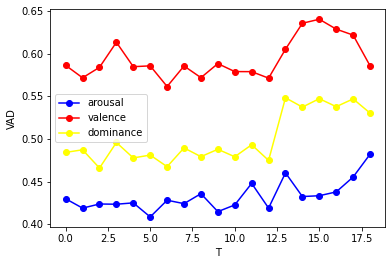

In [ ]:
import matplotlib.pyplot as plt
#print(a_result[0])
for movie in a_result:
    f1 = plt.figure()
    plt.plot(movie[1].get("arousal"),color = "Blue", marker="o",label="arousal")
    plt.plot(movie[1].get("valence"),color = "Red", marker="o",label="valence")
    plt.plot(movie[1].get("dominance"),color = "Yellow", marker="o",label="dominance")
    plt.legend(loc="best")
    plt.ylabel("VAD")
    plt.xlabel("T")
    plt.savefig("output/"+movie[0]+".jpg",format="jpg")
    plt.clf()

  

<hr style="border:2px solid black"> </hr>

## Feature Extraction

<hr style="border:2px solid black"> </hr>

## VAD Vectorization

<hr style="border:2px solid black"> </hr>

## Output